##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Negative Neurons - Feature Visualization

This notebook uses  [**Lucid**](https://github.com/tensorflow/lucid) to reproduce the results in [Feature Visualization](https://distill.pub/2017/feature-visualization/).

This notebook doesn't introduce the abstractions behind lucid; you may wish to also read the [Lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb).

**Note**: The easiest way to use this tutorial is as a colab notebook, which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Install, Import, Load Model

In [1]:

import numpy as np
import scipy.ndimage as nd
import tensorflow as tf


import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [2]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

# Negative Channel Visualizations


<img src="https://storage.googleapis.com/lucid-static/feature-visualization/4.png" width="800"></img>

Unfortunately, constraints on ImageNet mean we can't provide an easy way for you to reproduce the dataset examples. However, we can reproduce the positive / negative optimized visualizations:

2025-03-10 14:07:58.204024: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-03-10 14:07:58.204085: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-10 14:07:58.204136: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (leila-aspirea51545): /proc/driver/nvidia/version does not exist
2025-03-10 14:07:58.205176: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-03-10 14:07:58.228036: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2097005000 Hz
2025-03-10 14:07:58.229972: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6139db296470 initialized for platform Host (this does not guarant

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



512 3236.5464



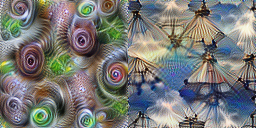

In [3]:
param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("mixed4a_pre_relu", 492, batch=1) - objectives.channel("mixed4a_pre_relu", 492, batch=0)
_ = render.render_vis(model, obj, param_f)